In [1]:
import sys, os
import numpy as np

In [2]:
traj = np.load('traj_lambda1.00.npz')['arr_0'].item()['trajectory']
print traj

[[0, 141.68254262626357, 1, 21, [[151], [116, 70]]], [1, 141.68254262626357, 1, 21, [[151], [116, 70]]], [2, 140.79900237494866, 1, 21, [[151], [117, 70]]], [3, 140.79900237494866, 1, 21, [[151], [117, 70]]], [4, 140.79900237494866, 1, 21, [[151], [117, 70]]], [5, 140.79900237494866, 0, 21, [[151], [117, 70]]], [6, 140.79900237494866, 0, 21, [[151], [117, 70]]], [7, 100.03326864741169, 1, 2, [[151], [117, 70]]], [8, 96.98644942141058, 1, 2, [[152], [117, 70]]], [9, 96.98644942141058, 1, 2, [[152], [117, 70]]], [10, 96.98644942141058, 0, 2, [[152], [117, 70]]], [11, 96.98644942141058, 0, 2, [[152], [117, 70]]], [12, 96.98644942141058, 1, 2, [[152], [117, 70]]], [13, 96.98644942141058, 0, 2, [[152], [117, 70]]], [14, 96.98644942141058, 0, 2, [[152], [117, 70]]], [15, 96.98644942141058, 1, 2, [[152], [117, 70]]], [16, 95.96772303837787, 1, 2, [[152], [118, 70]]], [17, 95.96772303837787, 0, 2, [[152], [118, 70]]], [18, 95.96772303837787, 0, 2, [[152], [118, 70]]], [19, 94.92173800618151, 1

In [5]:
allowed_sigma_J = np.load('traj_lambda1.00.npz')['arr_0'].item()['allowed_sigma'][0]
allowed_sigma_noe = np.load('traj_lambda1.00.npz')['arr_0'].item()['allowed_sigma'][1]
allowed_gamma = np.load('traj_lambda1.00.npz')['arr_0'].item()['allowed_gamma']
print allowed_sigma_J, allowed_sigma_noe, allowed_gamma





[  0.05         0.051        0.05202      0.0530604    0.05412161
   0.05520404   0.05630812   0.05743428   0.05858297   0.05975463
   0.06094972   0.06216872   0.06341209   0.06468033   0.06597394
   0.06729342   0.06863929   0.07001207   0.07141231   0.07284056
   0.07429737   0.07578332   0.07729898   0.07884496   0.08042186
   0.0820303    0.08367091   0.08534432   0.08705121   0.08879223
   0.09056808   0.09237944   0.09422703   0.09611157   0.0980338
   0.09999448   0.10199437   0.10403425   0.10611494   0.10823724
   0.11040198   0.11261002   0.11486222   0.11715947   0.11950266
   0.12189271   0.12433056   0.12681718   0.12935352   0.13194059
   0.1345794    0.13727099   0.14001641   0.14281674   0.14567307
   0.14858653   0.15155826   0.15458943   0.15768122   0.16083484
   0.16405154   0.16733257   0.17067922   0.17409281   0.17757466
   0.18112616   0.18474868   0.18844365   0.19221253   0.19605678
   0.19997791   0.20397747   0.20805702   0.21221816   0.21646252
   0.220791

In [6]:
sampled_sigma_J = []
sampled_sigma_noe = []
sampled_gamma = []
# append sampled nuisance paramters, this part is hard coded now, will be fixed in the future
for i in range(len(traj)):
    sampled_sigma_J.append(allowed_sigma_J[traj[i][4][0][0]])
    sampled_sigma_noe.append(allowed_sigma_noe[traj[i][4][1][0]])
    sampled_gamma.append(allowed_gamma[traj[i][4][1][1]])

time = np.arange(1,len(sampled_sigma_J)+0.1,1)


    

plotting figures...


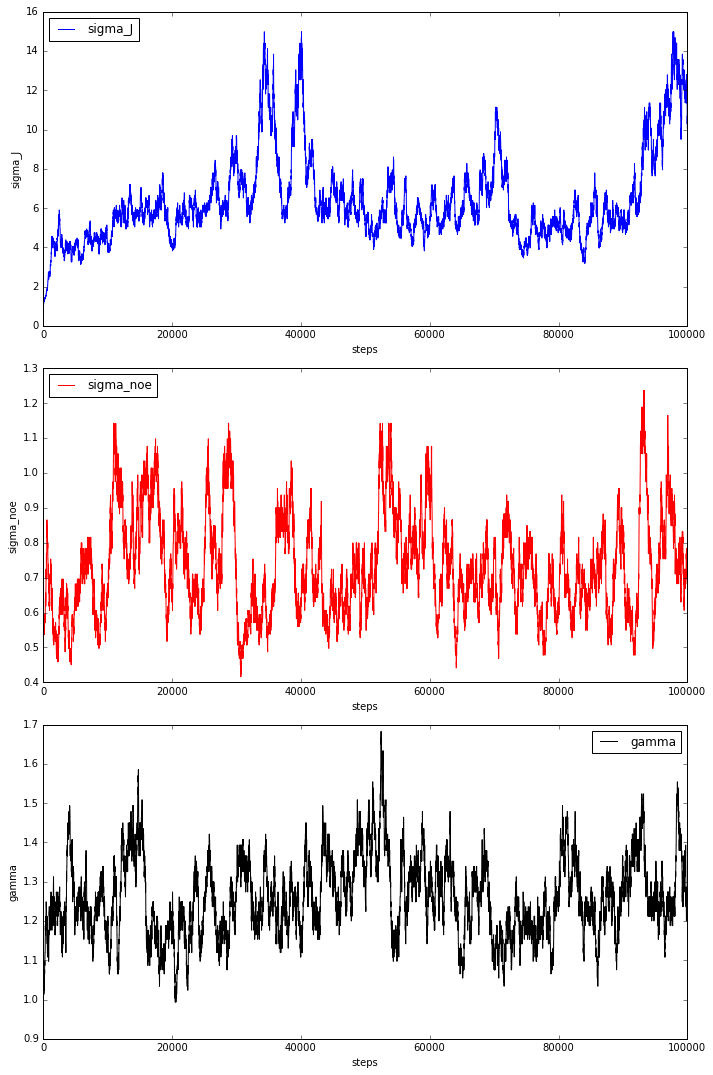

In [7]:
print "plotting figures..."
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
plt.plot(time,sampled_sigma_J,label='sigma_J',color='blue')
plt.xlabel('steps')
plt.ylabel('sigma_J')
plt.legend(loc='best')
plt.subplot(3,1,2)
plt.plot(time,sampled_sigma_noe,label='sigma_noe',color='red')
plt.xlabel('steps')
plt.ylabel('sigma_noe')
plt.legend(loc='best')
plt.subplot(3,1,3)
plt.plot(time,sampled_gamma,label='gamma',color='black')
plt.xlabel('steps')
plt.ylabel('gamma')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('sampled_parameters.pdf')
plt.show()